In [1]:
%run 'Functions.ipynb'

In [112]:
def hist_terms(terms=None, interval='week', start='1900-01-01', end='2020-01-01'):
    q = Search(index='hep-analysis')[0:0]
    if terms:
        q = q.query('match_phrase', **{'abstracts.value': terms})
    q = q.filter('range', earliest_date={'gte': start, 'lt': end})
    q.aggs.bucket(
        'group_by_date', 
        'date_histogram', 
        field='earliest_date', 
        interval=interval,
        format='date_optional_time'
    )
    return q.execute().aggregations.group_by_date.buckets

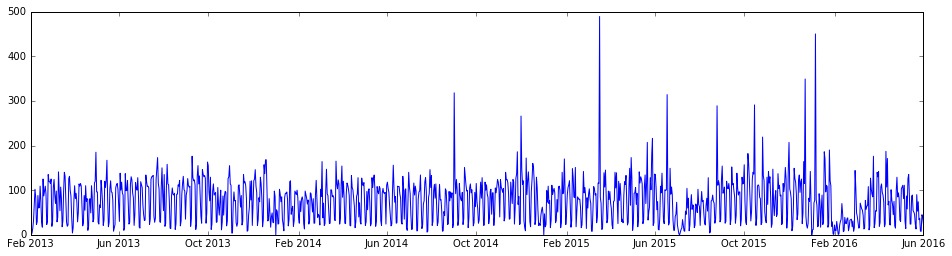

In [113]:
tx, ty = unzip(hist_terms(interval='day'))
plt.plot(tx, ty)

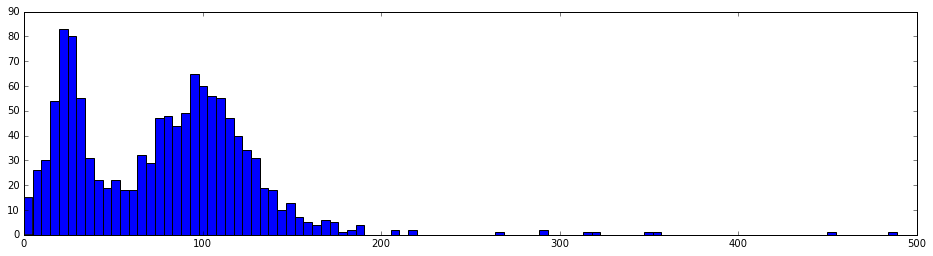

In [114]:
plt.hist(ty, bins=100)
plt.show()

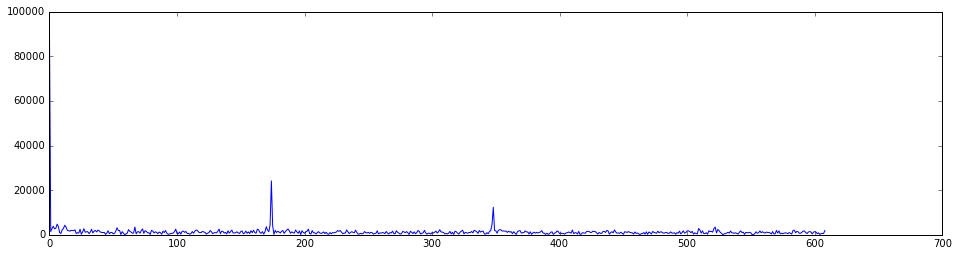

In [115]:
plt.plot(np.abs(np.fft.rfft(ty)))

In [122]:
fft = np.abs(np.fft.rfft(ty))
fft[fft < 12000] = 0

In [224]:
days = (max(tx)-min(tx)).days
days

1218

In [126]:
np.argsort(-fft)[:5]

array([  0, 174, 348, 403, 404])

In [135]:
np.nonzero(fft)

(array([  0, 174, 348]),)

In [132]:
1 / (np.nonzero(fft)[0][1:] / days)

array([ 6.98850575,  3.49425287])

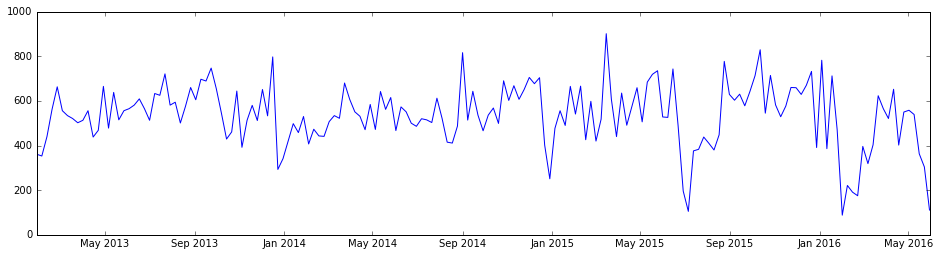

In [148]:
tx, ty = unzip(hist_terms())
plt.plot(tx, ty)

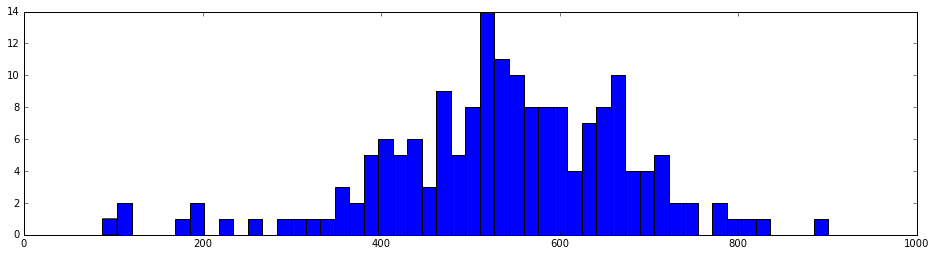

In [149]:
plt.hist(ty, bins=50)
plt.show()

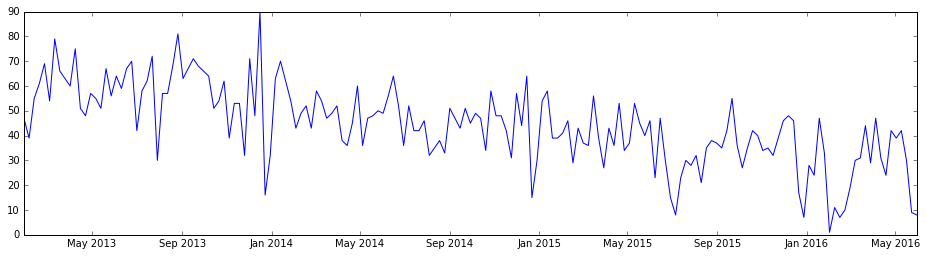

In [169]:
x, y = unzip(hist_terms('galaxy'))
plt.plot(x, y)

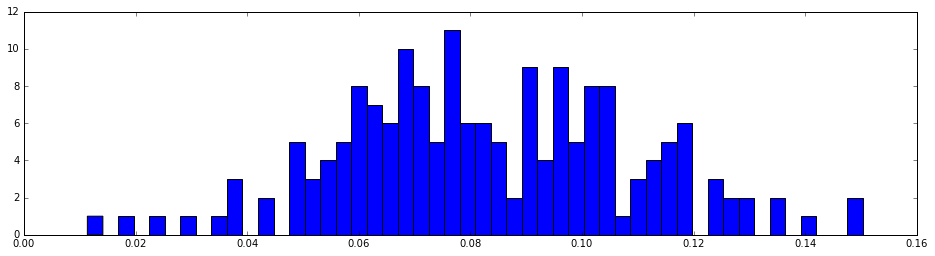

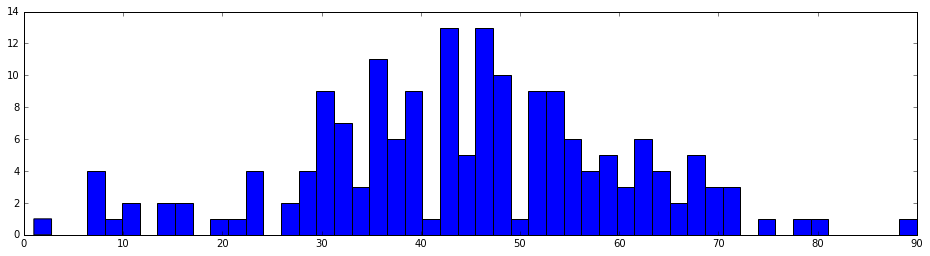

In [170]:
plt.hist(zero_div(y, ty), bins=50)
plt.show()
plt.hist(y, bins=50)
plt.show()

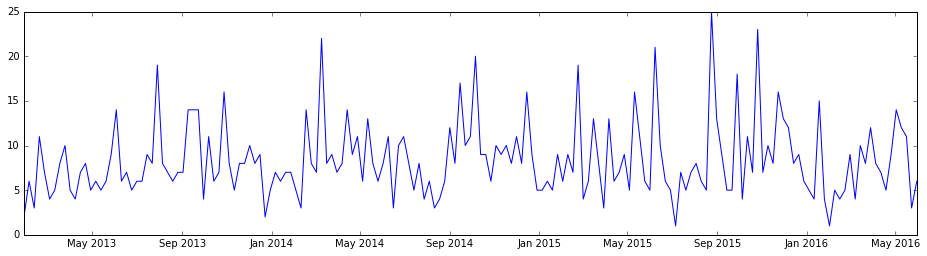

In [221]:
x, y = unzip(hist_terms('laser'))
plt.plot(x, y)

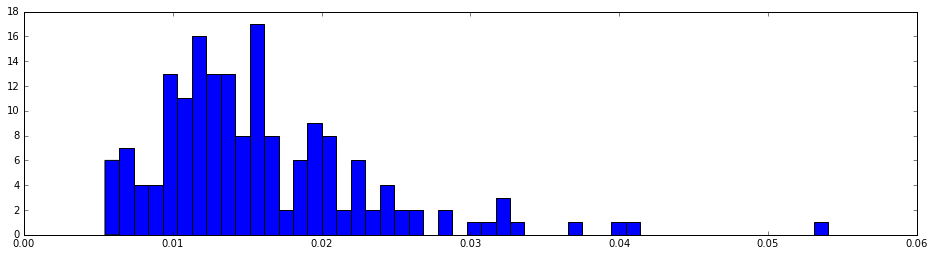

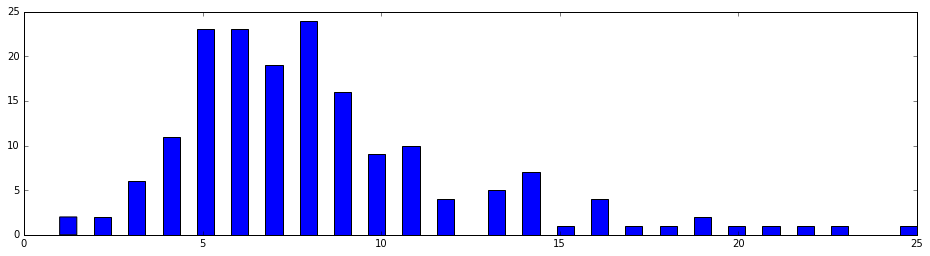

In [222]:
plt.hist(zero_div(y, ty), bins=50)
plt.show()
plt.hist(y, bins=50)
plt.show()

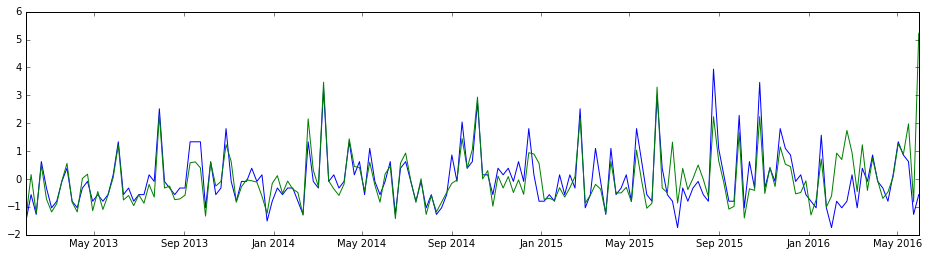

In [223]:
plt.plot(x, sp.stats.zscore(y), label='raw zscore')
plt.plot(x, sp.stats.zscore(zero_div(y, ty)), label='norm. zscore')
#plt.legend()

In [174]:
def zscore_plot(terms, normed=False):
    tx, ty = unzip(hist_terms())
    x, y = unzip(hist_terms('neutrino'))
    plt.plot(x, y)

In [182]:
id_week1 = interval_ids('2013-03-01')
id_week2 = interval_ids('2013-03-08')
id_week3 = interval_ids('2013-03-15')
id_week4 = interval_ids('2013-03-22')

In [183]:
terms_week1 = fold_vectors(term_vectors(id_week1, 'abstracts.value'))
terms_week2 = fold_vectors(term_vectors(id_week2, 'abstracts.value'))
terms_week3 = fold_vectors(term_vectors(id_week3, 'abstracts.value'))
terms_week4 = fold_vectors(term_vectors(id_week4, 'abstracts.value'))

In [4]:
terms_week1

{'centrifugal': {'doc_freq': 2,
  'doc_total': 27,
  'term_freq': 8,
  'term_total': 100},
 'precession': {'doc_freq': 2,
  'doc_total': 75,
  'term_freq': 6,
  'term_total': 343},
 'photon undergo': {'doc_freq': 1,
  'doc_total': 2,
  'term_freq': 1,
  'term_total': 3},
 'minimize systematic bias': {'doc_freq': 1,
  'doc_total': 2,
  'term_freq': 1,
  'term_total': 3},
 'graph encode': {'doc_freq': 1,
  'doc_total': 1,
  'term_freq': 6,
  'term_total': 6},
 'high redshift cmb': {'doc_freq': 1,
  'doc_total': 2,
  'term_freq': 1,
  'term_total': 2},
 'radial mode': {'doc_freq': 1,
  'doc_total': 5,
  'term_freq': 4,
  'term_total': 19},
 'thin line': {'doc_freq': 1, 'doc_total': 1, 'term_freq': 4, 'term_total': 4},
 'lie group furthermore': {'doc_freq': 1,
  'doc_total': 2,
  'term_freq': 2,
  'term_total': 3},
 'agegraphic dark energy': {'doc_freq': 1,
  'doc_total': 6,
  'term_freq': 2,
  'term_total': 10},
 'unique case': {'doc_freq': 1,
  'doc_total': 2,
  'term_freq': 3,
  'term_t

In [190]:
selected = {}
for k, v in sorted(terms_week1.items()):
    if v['doc_freq'] >= 5:
        selected[k] = v

In [191]:
len(selected)

1910

camera


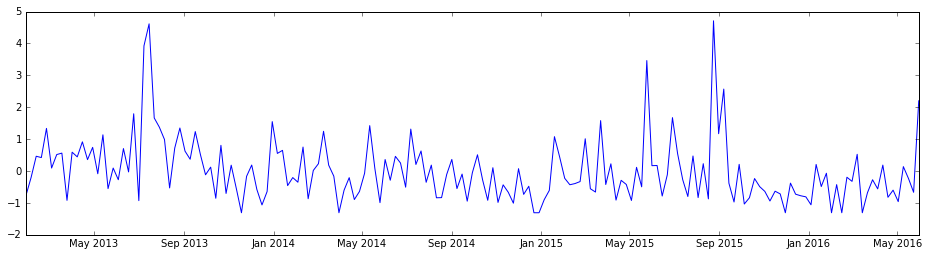

flux


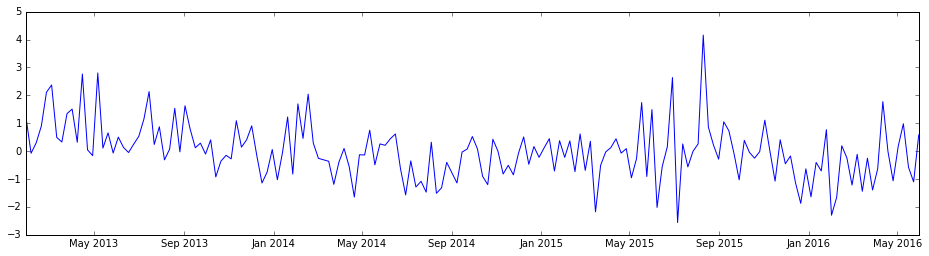

monitor


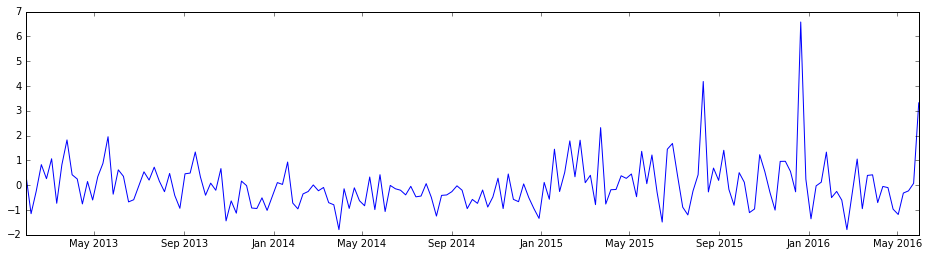

angular


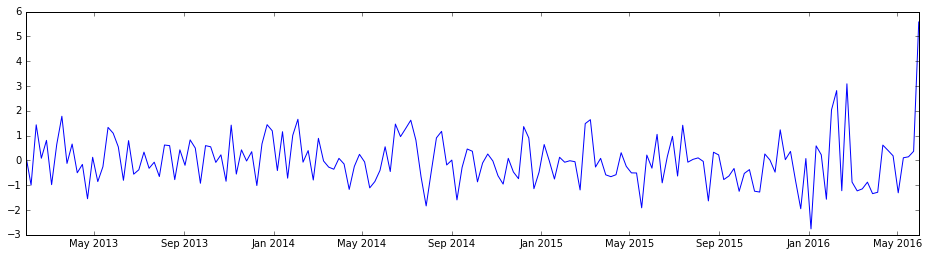

ads


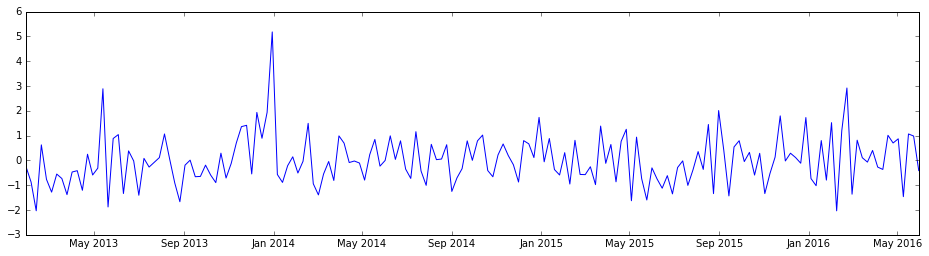

avoid


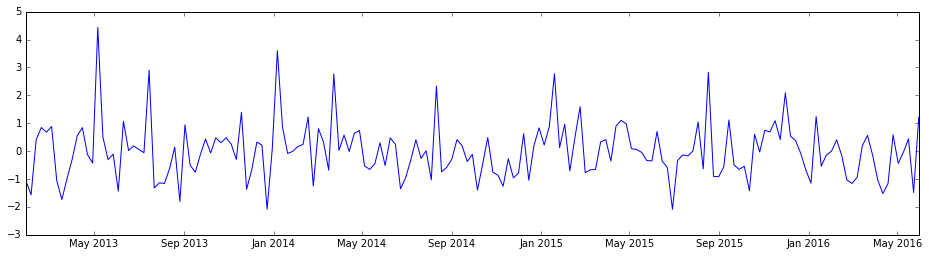

clear


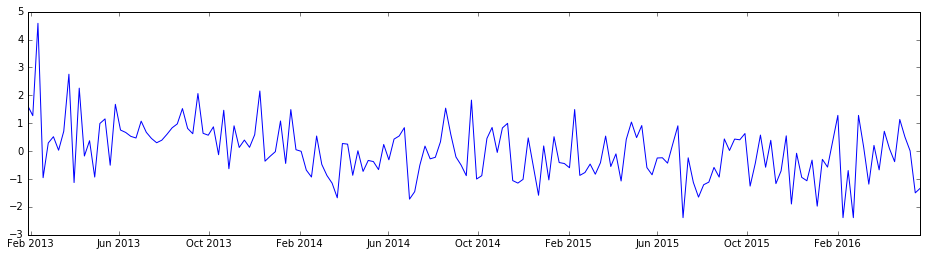

optimize


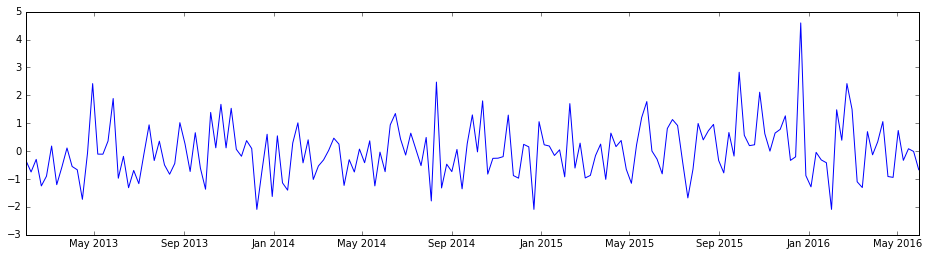

distant


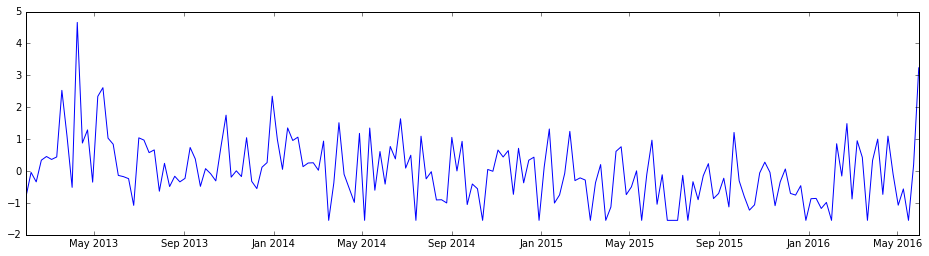

energetic


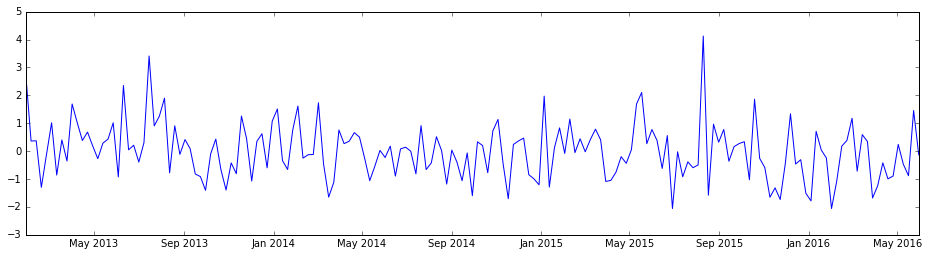

provide evidence


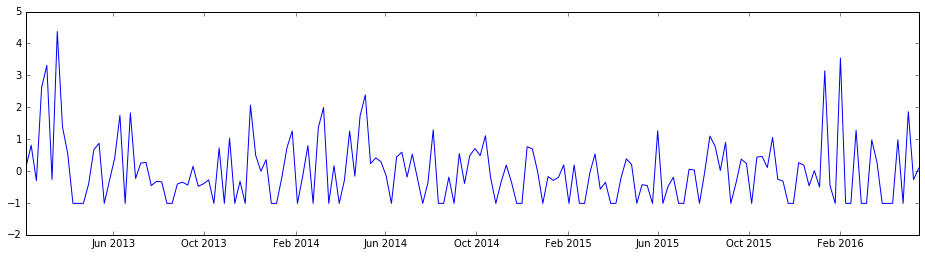

separation


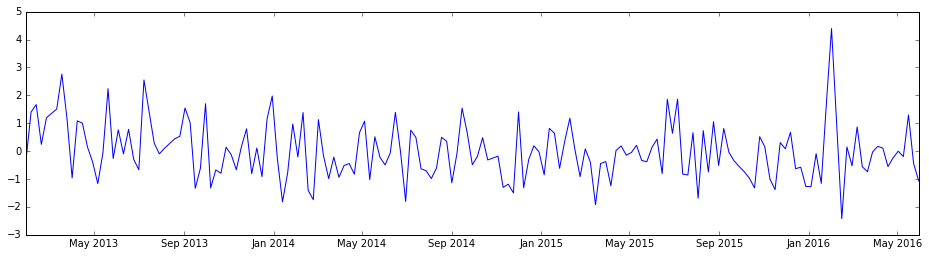

modification


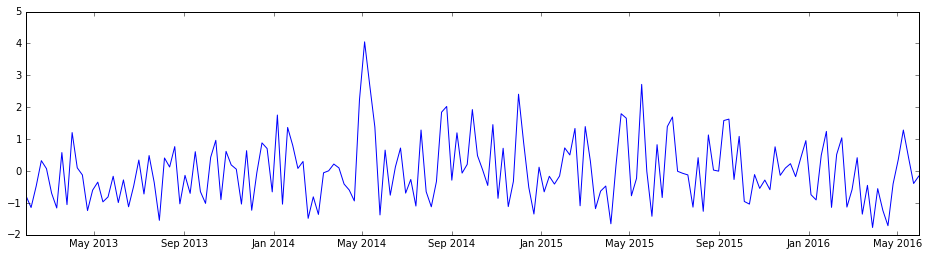

empirical


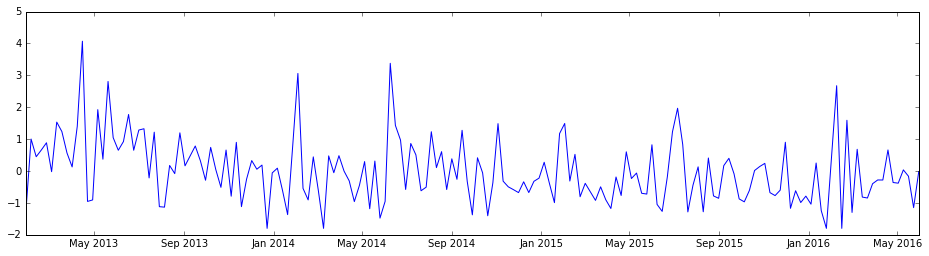

gauge boson


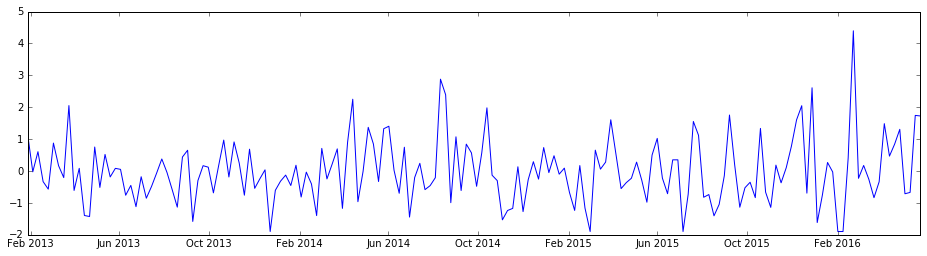

electromagnet


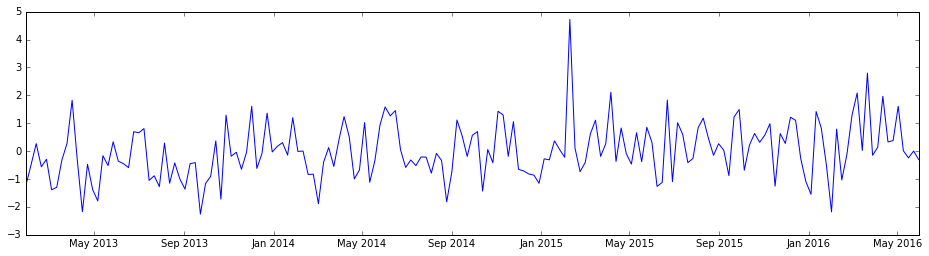

unitar


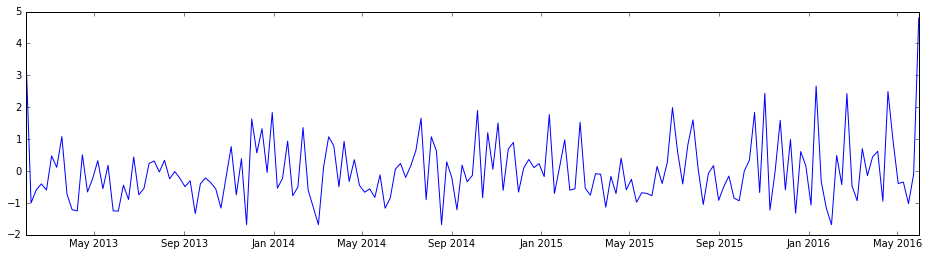

interpretation


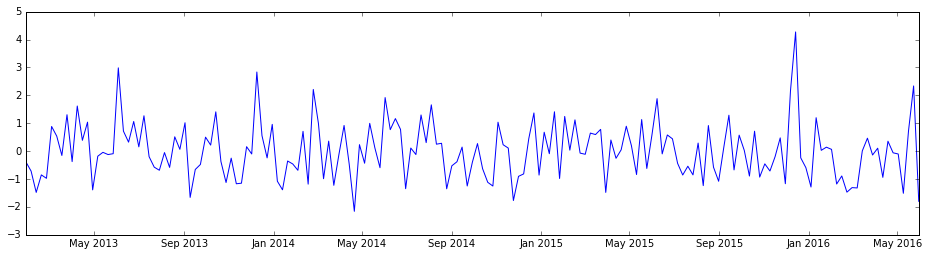

exclude


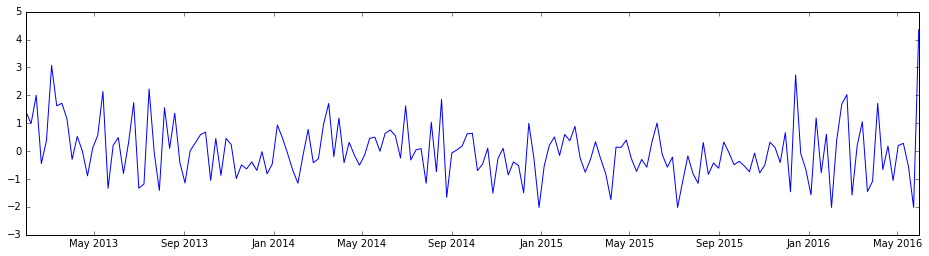

fb collected


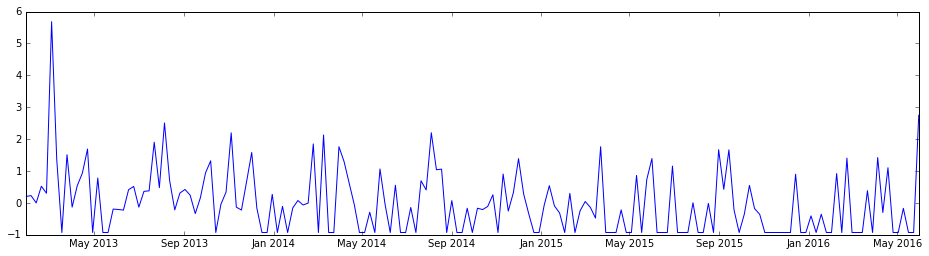

except


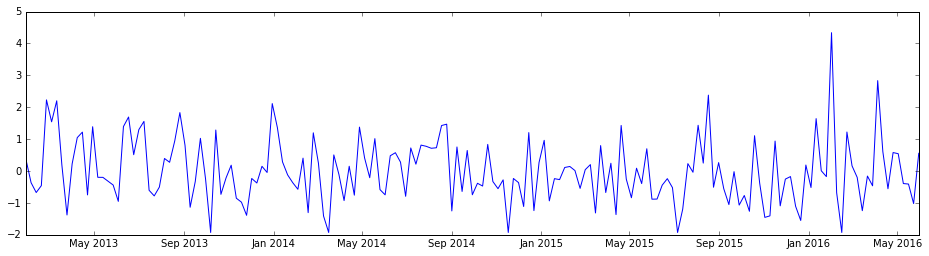

In [229]:
for k, v in list(selected.items())[:100]:
    x, y = unzip(hist_terms(k))
    start = np.where(tx == min(x))[0][0]
    end = np.where(tx == max(x))[0][0]
    score = sp.stats.zscore(zero_div(y, ty[start:end+1]))
    if max(score) >= 4:
        print(k)
        plt.plot(x, score)
        plt.show()